In [1]:
import glob
import json

import xarray as xr
import numpy as np

import pandas as pd
import seaborn as sns

# Best model plot -- HEATMAP

In [2]:
srch_str = '/home/hanna/EX3_AR_SUMMARY/*.json'

In [3]:
glob.glob(srch_str)

['/home/hanna/EX3_AR_SUMMARY/Xar_mae_performance.json',
 '/home/hanna/EX3_AR_SUMMARY/Xar_mse_performance.json',
 '/home/hanna/EX3_AR_SUMMARY/ar_mse_performance.json',
 '/home/hanna/EX3_AR_SUMMARY/Yar_mae_performance.json',
 '/home/hanna/EX3_AR_SUMMARY/ar_mae_performance.json']

In [4]:
# For when actually reading the json file.
with open('/home/hanna/EX3_AR_SUMMARY/ar_mae_performance.json') as f:
    data = json.load(f)

In [5]:
data

{'AR-B-5-L5': {'mae_train': [nan,
   671.3465085862642,
   663.168293601844,
   659.7584775029061,
   658.3037892026349,
   657.5310568623834],
  'mae_test': [nan,
   650.5521953120024,
   643.6644140773706,
   640.6431257749405,
   639.2869404499774,
   638.5771301517702],
  'num_trained_models': [13041, 13041, 13041, 13041, 13041, 13041]},
 'TR-B-5-L5': {'mae_train': [nan,
   1959.9831871359675,
   1931.7075512039257,
   1919.1626480225382,
   1913.2349780199302,
   1909.8078351281385],
  'mae_test': [nan,
   1927.8631768704374,
   1900.9120094325754,
   1889.1204821526762,
   1883.5870120414293,
   1880.4800433776545],
  'num_trained_models': [0, 13041, 13041, 13041, 13041, 13041]},
 'AR-T-5-L5': {'mae_train': [nan,
   5482.146935013481,
   nan,
   5408.834698734015,
   5372.999894682853,
   5338.918759492995],
  'mae_test': [nan,
   5780.75499021119,
   nan,
   5723.062510722784,
   5694.592531966111,
   5667.046378989056],
  'num_trained_models': [13041, 13041, 13041, 13041, 13040

In [8]:
data.keys()

dict_keys(['AR-B-5-L5', 'TR-B-5-L5', 'AR-T-5-L5', 'TR-T-5-L5', 'AR-S-5-L5', 'TR-S-5-L5', 'AR-B-S-5-L5', 'TR-B-S-5-L5', 'AR-T-S-5-L5', 'TR-T-S-5-L5', 'AR-5-L5', 'TR-5-L5'])

In [12]:
mae = 'mae_test'

In [28]:
subset = {}

In [9]:
mae = 'mae_test'
subset = {}
for key, item in data.items():
    key = key.split('-5-')[0]
    subset[key] = item[mae]

In [10]:
subset

{'AR-B': [nan,
  395.5855620342664,
  392.02873690390953,
  390.5588770539713,
  390.0462830124256,
  390.2190448101485],
 'TR-B': [nan,
  1169.1104051375185,
  1156.272720971215,
  1151.2183560609717,
  1149.7148839223755,
  1149.705742921129],
 'AR-T': [nan,
  2679.0511742006256,
  nan,
  2644.252024652008,
  2630.1528113364693,
  2618.1711758104852],
 'TR-T': [nan,
  3686.994519430901,
  3666.0837197981045,
  3646.8216113458893,
  3631.432102666765,
  3617.9131745637433],
 'AR-S': [nan,
  313.98832509408686,
  311.02709842174914,
  309.79755014794165,
  309.408631794893,
  309.33779942136704],
 'TR-S': [nan,
  895.2099042733385,
  897.3956671655492,
  901.5888099213091,
  906.2545945915755,
  910.5602905838775],
 'AR-B-S': [nan,
  311.99892690934644,
  309.2064654201156,
  308.0638118697857,
  307.7269027771114,
  307.78192567998246],
 'TR-B-S': [nan,
  nan,
  1000.5565332792975,
  996.0964082596453,
  994.6767029542682,
  994.6187159031736],
 'AR-T-S': [nan,
  2070.293763408762,
  

In [6]:
import pandas as pd
import seaborn as sns

In [11]:
mae = 'mae_test'
subset = {}
for key, item in data.items():
    key = key.split('-5-')[0]
    subset[key] = item[mae]
df = pd.DataFrame.from_dict(subset).transpose()

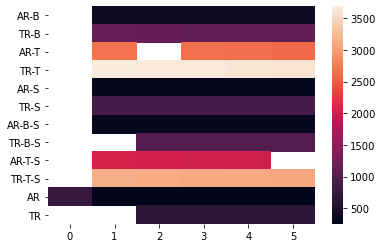

In [13]:
sns.heatmap(df)

In [ ]:
TEXT_WIDTH_IN  = 6.1023622
TEXT_HEIGHT_IN = 9.72440945

import matplotlib.pyplot as plt

mae = 'num_trained_models'
mae = 'mae_test'

for mae in ['num_trained_models', 'mae_test']:
    subset = {}
    for key, item in data.items():
        key = key.split('-5-')[0]
        subset[key] = item[mae]*43824
    df = pd.DataFrame.from_dict(subset).transpose()

    fig, ax = plt.subplots(1, 1, figsize = (TEXT_WIDTH_IN, 0.5*TEXT_WIDTH_IN) )

    ax = sns.heatmap(df, linewidths=0.1, annot=True, # fmt="d",
                cbar_kws={'label':'{}'.format(mae)}, ax = ax, cmap = 'viridis', fmt = '5.2f')

    ax.set_ylabel('Model')
    ax.set_xlabel('Lag')

    plt.subplots_adjust(hspace = 0.2, top=0.97, bottom=0.20, left = 0.15, right = 1.0)
    fig.savefig(path_python_figures + 'heat_ar_model_{}_score.png'.format(mae))
    print('Finished {}'.format(mae))
